In [1]:
import numpy as np
import cv2

from collections import Counter


from matplotlib import pyplot as plt

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

In [55]:
f = '00003.jpg'
img_cov = cv2.imread('../Cover/' + f)
# img_cov = cv2.cvtColor(img_cov, cv2.COLOR_BGR2YCR_CB)
# # get the Y 
# img_cov = img_cov[:,:,0]
# img_cov = img_cov[200:250, 200:250]

In [56]:
img_cov

array([[[112, 120, 133],
        [112, 120, 133],
        [122, 128, 139],
        ...,
        [ 69,  68,  72],
        [ 71,  71,  71],
        [ 76,  77,  75]],

       [[100, 106, 117],
        [ 99, 106, 115],
        [105, 110, 119],
        ...,
        [ 71,  69,  75],
        [ 72,  69,  71],
        [ 73,  71,  71]],

       [[ 90,  96, 103],
        [ 91,  94, 102],
        [ 94,  98, 103],
        ...,
        [ 71,  68,  77],
        [ 71,  67,  73],
        [ 73,  66,  73]],

       ...,

       [[ 90,  91,  95],
        [ 94,  93,  95],
        [ 93,  92,  94],
        ...,
        [ 73,  82,  92],
        [ 70,  79,  88],
        [ 67,  77,  84]],

       [[ 91,  98, 101],
        [ 93,  98, 101],
        [ 91,  95,  96],
        ...,
        [ 64,  65,  75],
        [ 62,  63,  73],
        [ 60,  62,  70]],

       [[ 85,  97,  99],
        [ 87,  96,  99],
        [ 89,  94,  95],
        ...,
        [ 62,  56,  67],
        [ 62,  57,  66],
        [ 62,  57,  66]]

In [32]:
# img_cov = np.array([[0,2,1,3,1,0,4],
#           [0,1,3,5,2,4,2],
#           [1,4,3,5,2,2,3],
#           [4,2,1,5,3,2,1],
#           [2,4,1,5,2,3,4],
#           [3,1,4,5,1,2,3],
#           [4,1,5,2,3,4,1]])

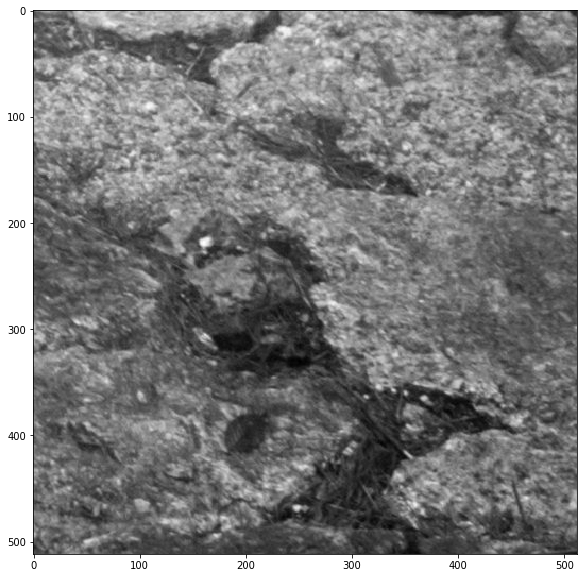

In [33]:
plt.imshow(img_cov, cmap='gray')

In [38]:
%timeit load(jpeg_file)

8.11 ms ± 170 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
from jpeg2dct.numpy import load, loads


#read from a file
jpeg_file = '../Cover/' + f
dct_y, dct_cb, dct_cr = load(jpeg_file)

In [35]:
img_cov = np.zeros((512, 512))
for i in range(dct_y.shape[0]):
    for j in range(dct_y.shape[1]):
        img_cov[i*8:(i+1)*8, j*8:(j+1)*8] += dct_y[i][j].reshape(8, 8)

In [36]:
img_cov

array([[-141.,  -41.,    6., ...,    0.,    0.,    0.],
       [  50.,  -12.,  -21., ...,    0.,    0.,    0.],
       [  66.,    0.,    6., ...,    0.,    0.,    0.],
       ...,
       [   0.,    7.,    0., ...,    0.,    1.,    0.],
       [  -1.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

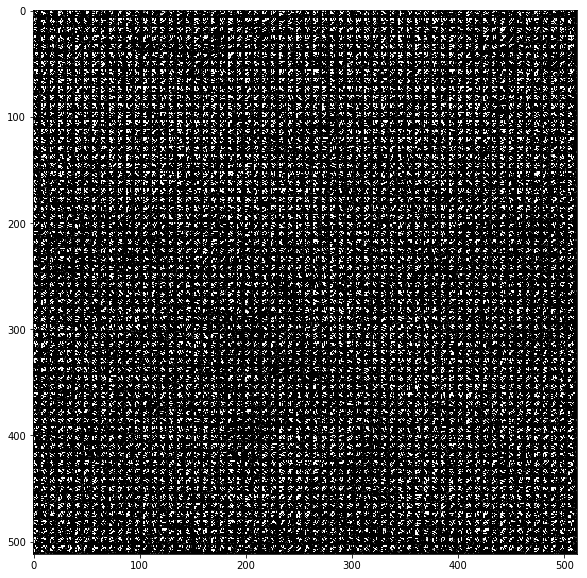

In [37]:
# img_cov = np.flip(img_cov, 1)

plt.imshow(img_cov, cmap='gray' ,vmax = np.max(img_cov)*0.01,vmin = 0)

In [702]:
i_prime = j_prime = 1
img_cov = img_cov.astype(int)
diff =  (img_cov[i_prime:] - img_cov[:img_cov.shape[0]-i_prime])
# diff = img_cov[:,:img_cov.shape[1]-j_prime] - img_cov[:, j_prime:]

In [731]:
# diff =  img_cov[i_prime:, j_prime:] - img_cov[:img_cov.shape[0]-i_prime, : img_cov.shape[1]-j_prime]

plt.imshow(diff, cmap='gray', vmax = np.max(dct)*0.01,vmin = 0)

NameError: name 'dct' is not defined

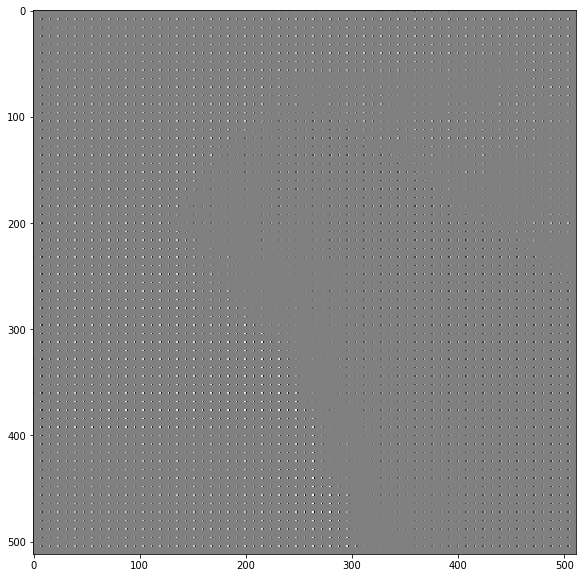

In [704]:
diff = img_cov[:,:img_cov.shape[1]-j_prime] - img_cov[:, j_prime:]

plt.imshow(diff, cmap='gray')

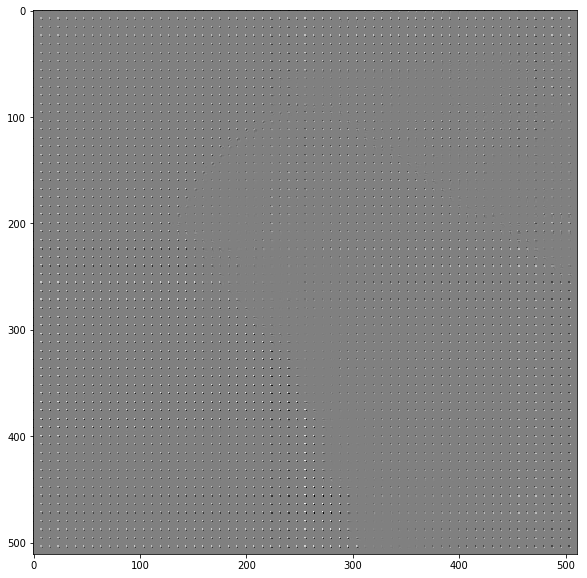

In [705]:
diff =  img_cov[:img_cov.shape[0]-i_prime, : img_cov.shape[1]-j_prime] - img_cov[i_prime:, j_prime:]

plt.imshow(diff, cmap='gray')

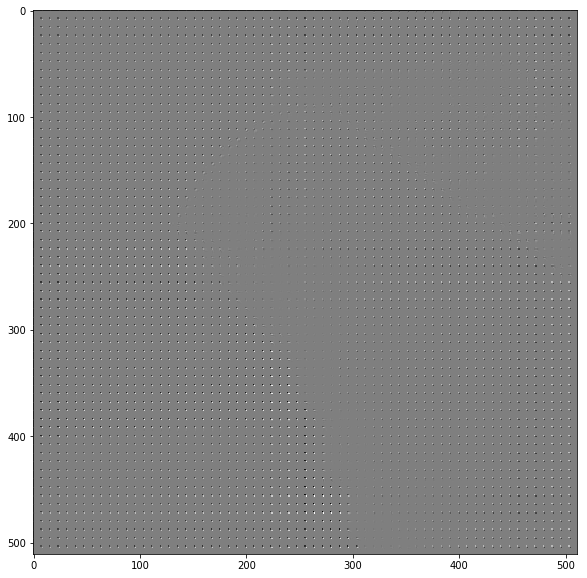

In [706]:
# img_cov = np.flip(img_cov, 1)

diff =  img_cov[i_prime:, j_prime:] - img_cov[:img_cov.shape[0]-i_prime, : img_cov.shape[1]-j_prime]

plt.imshow(diff, cmap='gray')

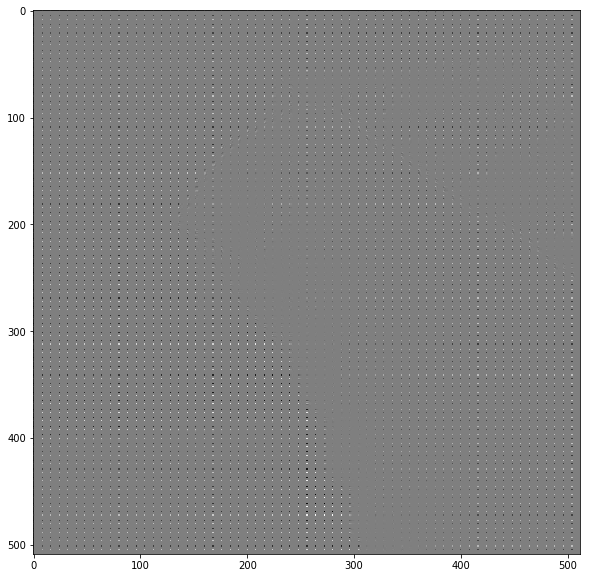

In [707]:
i_prime = j_prime = 3
img_cov = img_cov.astype(int)
diff =  (img_cov[i_prime:] - img_cov[:img_cov.shape[0]-i_prime])
# diff = img_cov[:,:img_cov.shape[1]-j_prime] - img_cov[:, j_prime:]
plt.imshow(diff, cmap='gray')

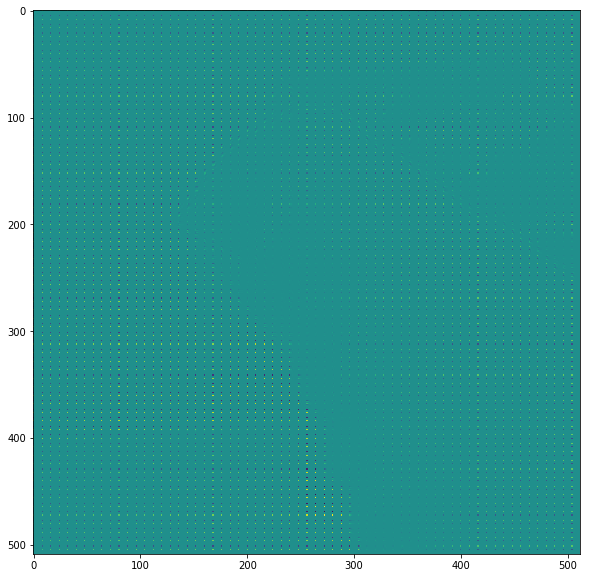

In [708]:
plt.imshow(diff)

In [709]:
# diff[:, 1]

In [710]:
diff.shape

(509, 512)

In [711]:
diff

array([[352,   6,  -5, ...,   0,   0,   0],
       [ -1,   6,   1, ...,  -1,   0,   1],
       [  0,   0,   1, ...,   0,   1,   0],
       ...,
       [ -8,  -1,   1, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0]])

In [712]:
diff = diff + 3

In [713]:
# diff[np.logical_and(diff>=0, diff<=3)]
diff

array([[355,   9,  -2, ...,   3,   3,   3],
       [  2,   9,   4, ...,   2,   3,   4],
       [  3,   3,   4, ...,   3,   4,   3],
       ...,
       [ -5,   2,   4, ...,   3,   3,   3],
       [  3,   3,   3, ...,   3,   3,   3],
       [  4,   3,   3, ...,   3,   3,   3]])

In [714]:
M = np.zeros((7,7))

for row in diff:
    for (i,j), c in Counter(zip(row, row[1:])).items():
#         print(i, j)
        if i >= 0 and i<=6 and j>=0 and j<=6:
            M[i][j] += c

In [716]:
M

array([[0.00000e+00, 0.00000e+00, 5.00000e+00, 2.60000e+01, 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 2.00000e+00, 3.60000e+01, 5.70000e+02, 3.90000e+01,
        1.00000e+00, 0.00000e+00],
       [5.00000e+00, 4.40000e+01, 1.83400e+03, 1.41810e+04, 1.86100e+03,
        5.60000e+01, 1.00000e+00],
       [2.00000e+01, 5.65000e+02, 1.45340e+04, 1.33922e+05, 1.42030e+04,
        5.92000e+02, 2.00000e+01],
       [4.00000e+00, 4.50000e+01, 1.82200e+03, 1.40770e+04, 1.81100e+03,
        5.00000e+01, 1.00000e+00],
       [0.00000e+00, 2.00000e+00, 5.00000e+01, 5.71000e+02, 5.40000e+01,
        2.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 2.20000e+01, 3.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [721]:
M[3]

array([2.00000e+01, 5.65000e+02, 1.45340e+04, 1.33922e+05, 1.42030e+04,
       5.92000e+02, 2.00000e+01])

In [722]:
np.diag(M, M.shape[0]-2)

array([0., 0.])

In [188]:
M = M/M.sum(axis=1)[:,None]
M[np.isnan(M)] = 0

In [189]:
np.round(M, 3)

array([[0.051, 0.113, 0.109, 0.462, 0.108, 0.106, 0.051],
       [0.066, 0.118, 0.104, 0.435, 0.099, 0.113, 0.064],
       [0.021, 0.046, 0.112, 0.645, 0.108, 0.046, 0.021],
       [0.014, 0.028, 0.113, 0.689, 0.114, 0.029, 0.013],
       [0.021, 0.051, 0.108, 0.641, 0.113, 0.045, 0.021],
       [0.059, 0.108, 0.102, 0.445, 0.099, 0.116, 0.07 ],
       [0.047, 0.112, 0.099, 0.479, 0.104, 0.109, 0.05 ]])

In [99]:
M[1][1]

0.4

In [62]:
def SPAM_Dd_count(img, i_prime=3, j_prime=3, T=3):
    #Dh
#     img = img.astype(int)
    diff = img[:img.shape[0]-i_prime, : img.shape[1]-j_prime] - img[i_prime:, j_prime:]
    diff = diff + T
#     print(diff.shape)
    
    M = [[0]*(2*T+1) for _ in range(2*T+1)]
#     M = np.zeros((7,7))
    for k in range(-diff.shape[1] + 2 , diff.shape[1] - 1):
#         for diag in np.diag(diff, k):
        diag = np.diag(diff, k)
#         print(diag)
        for (i,j), c in Counter(zip(diag, diag[1:])).items():
            if i >= 0 and i<=2*T and j>=0 and j<=2*T:
                M[i][j] += c
    
    return M

In [64]:
M = SPAM_Dd_count(img_cov.astype(int))

In [ ]:
T = 3
[[0]*(2*T+1) for _ in range(2*T+1)]

In [ ]:
def SPAM_Dv_count(img, i_prime=3, T=3):
    #Dh
#     img = img.astype(int)
    diff = img[:img.shape[0]-i_prime] - img[i_prime:]
    diff = diff + T
    
    M = [[0]*(2*T+1) for _ in range(2*T+1)]
#     M = np.zeros((7,7))
    for row in diff.T:
        for (i,j), c in Counter(zip(row, row[1:])).items():
            if i >= 0 and i<=2*T and j>=0 and j<=2*T:
                M[i][j] += c
    
    return M

In [ ]:
SPAM_Dv_count(img_cov.astype(int))

In [ ]:
from numba import jit

In [ ]:
def SPAM_Dh_count(img, j_prime=3, T=3):
    #Dh
#     img = img.astype(int)
    diff = img[:,:img.shape[1]-j_prime] - img[:, j_prime:]
    diff = diff + T
    
    M = [[0]*(2*T+1) for _ in range(2*T+1)]
    for row in diff:
        for (i,j), c in Counter(zip(row, row[1:])).items():
            if i >= 0 and i<=2*T and j>=0 and j<=2*T:
                M[i][j] += c
    
    return M

In [ ]:
SPAM_Dh_count(img_cov)

In [136]:
i_prime, j_prime = 3, 3
# diff = img_cov[:,:img_cov.shape[1]-j_prime] - img_cov[:, j_prime:]

# diff = img_cov[:img_cov.shape[0]-i_prime] - img_cov[i_prime:]
diff = img_cov[:img_cov.shape[0]-i_prime] - img_cov[i_prime:]

In [630]:
# diff = diff.ravel()

diff = img_cov.ravel()

diff = [d for d in diff if d!=0]

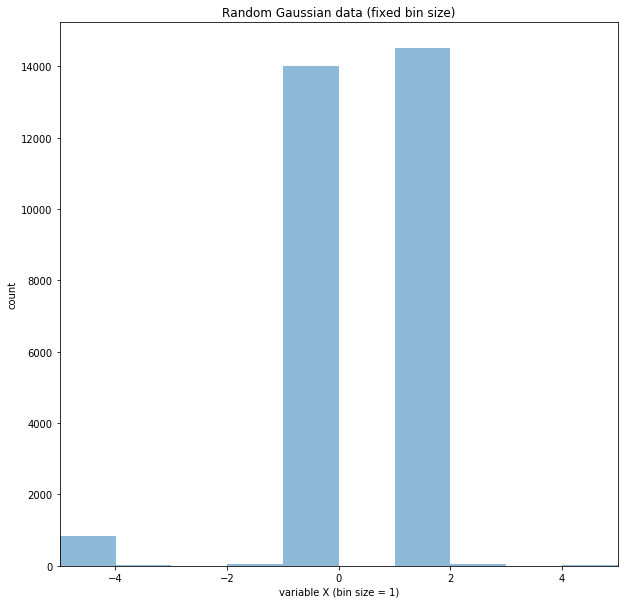

In [631]:
# data = np.random.normal(0, 20, 1000) 
lim = 5
# fixed bin size
bins = np.arange(-255, 255, 1) # fixed bin size

plt.xlim([-lim, lim])

plt.hist(diff, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 1)')
plt.ylabel('count')

plt.show()

In [629]:
diff

array([  8., -84.,   5., ...,   0.,   0.,  -1.])

In [41]:
from PIL import Image


In [46]:
i = Image.open(jpeg_file)
# i.draft('YCbCr', None)
i.load()

In [58]:
i.getpixel((0, 0))

(133, 120, 112)